# **Problem Set 4**

Daniel de Castro

October 8, 2021

# Problem 7

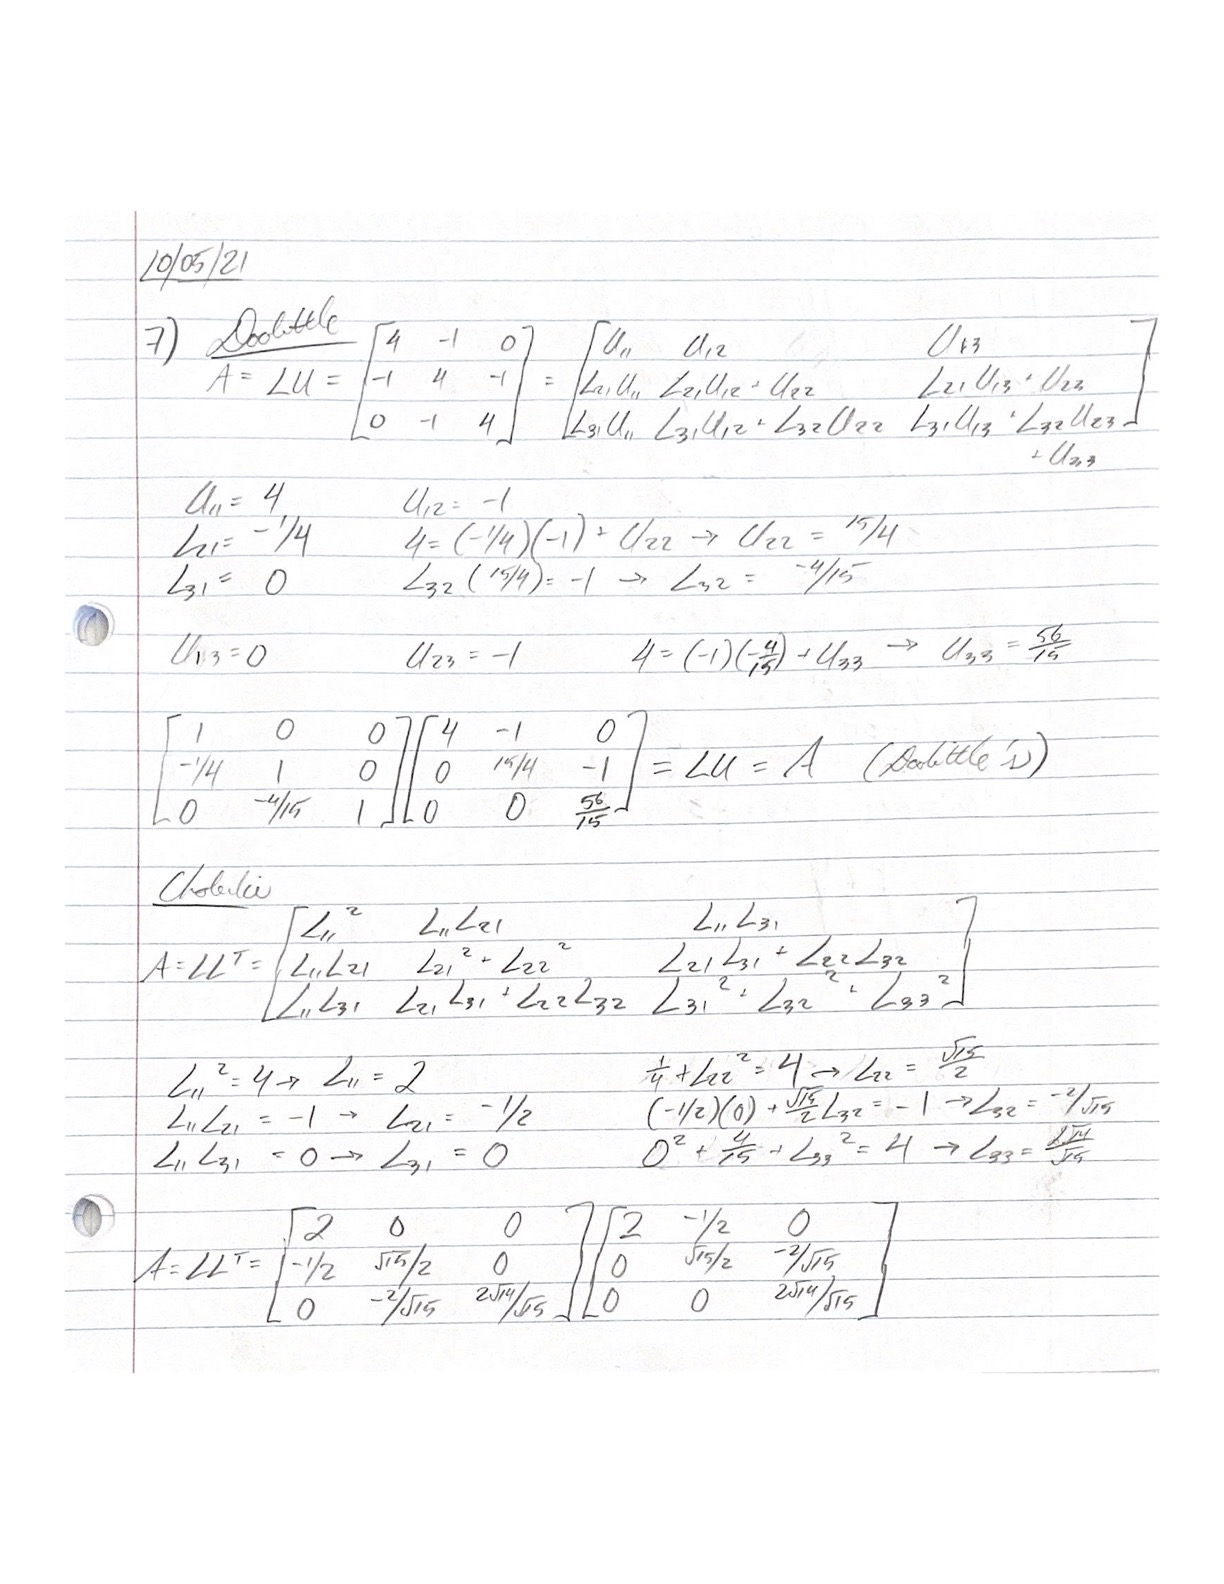

# Problem 8

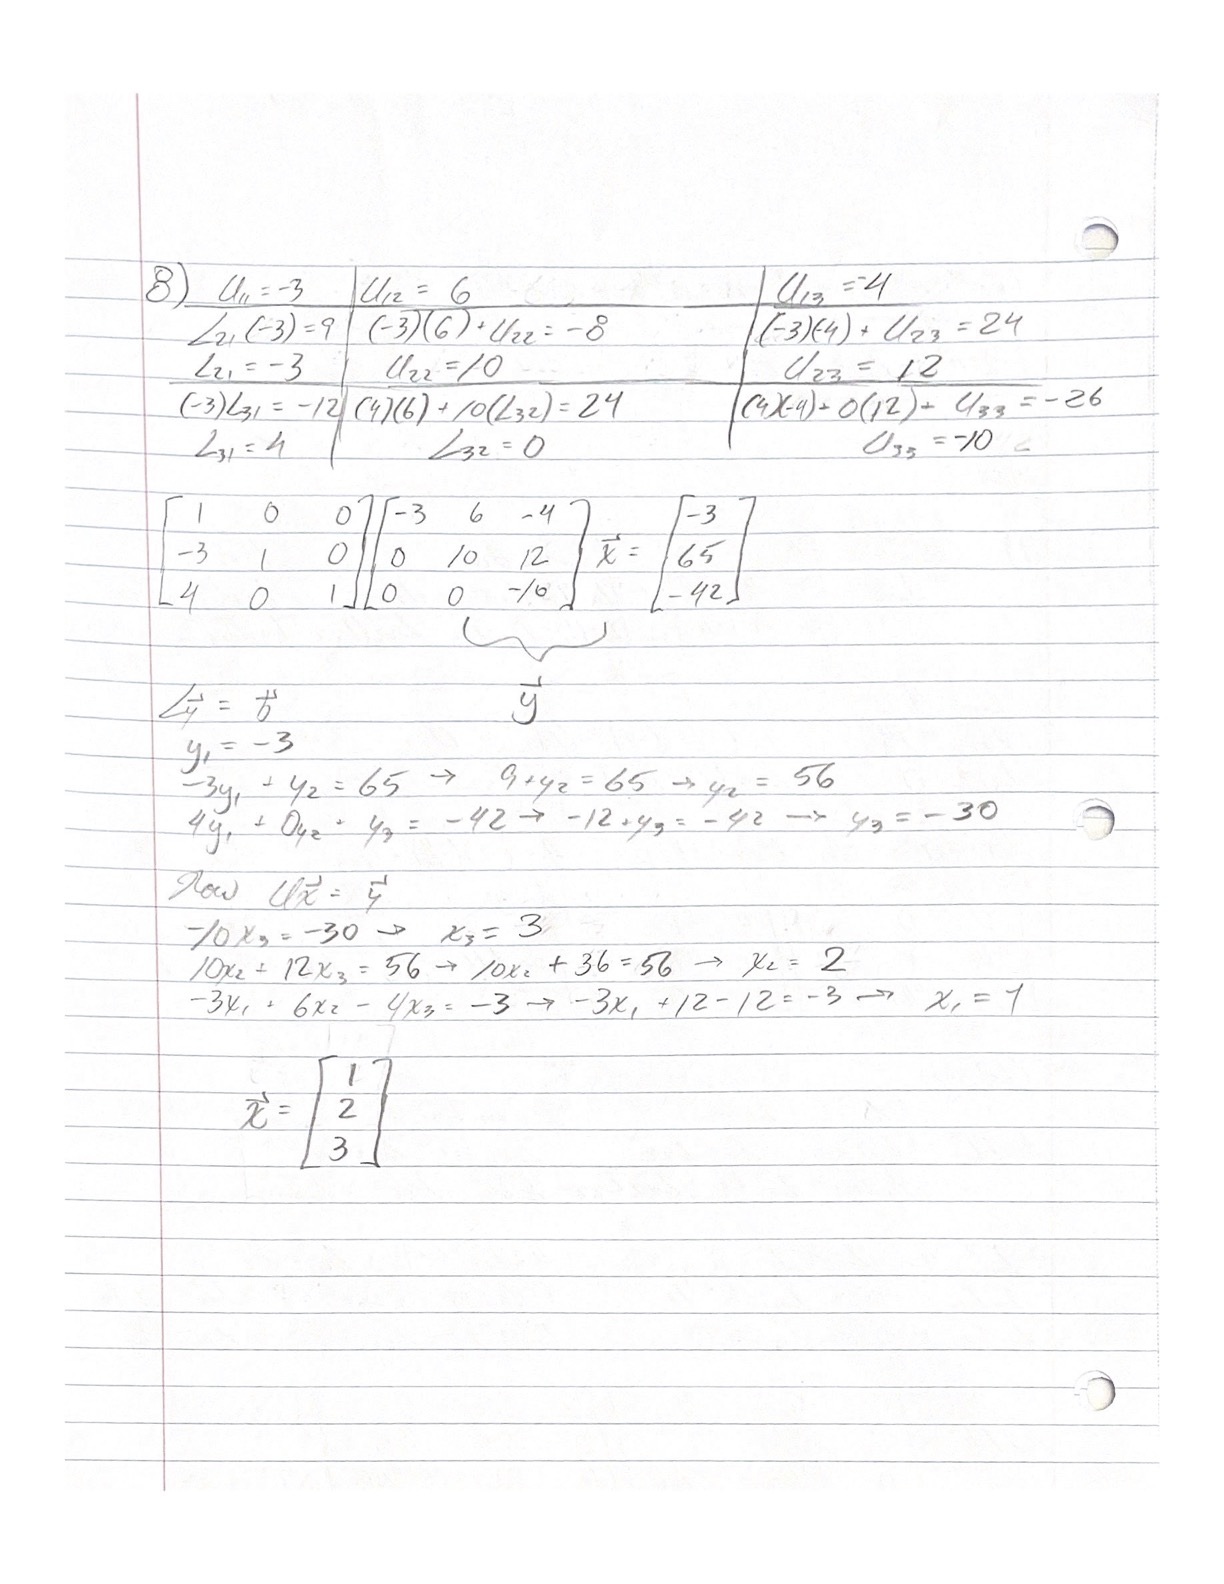

# Problem 10

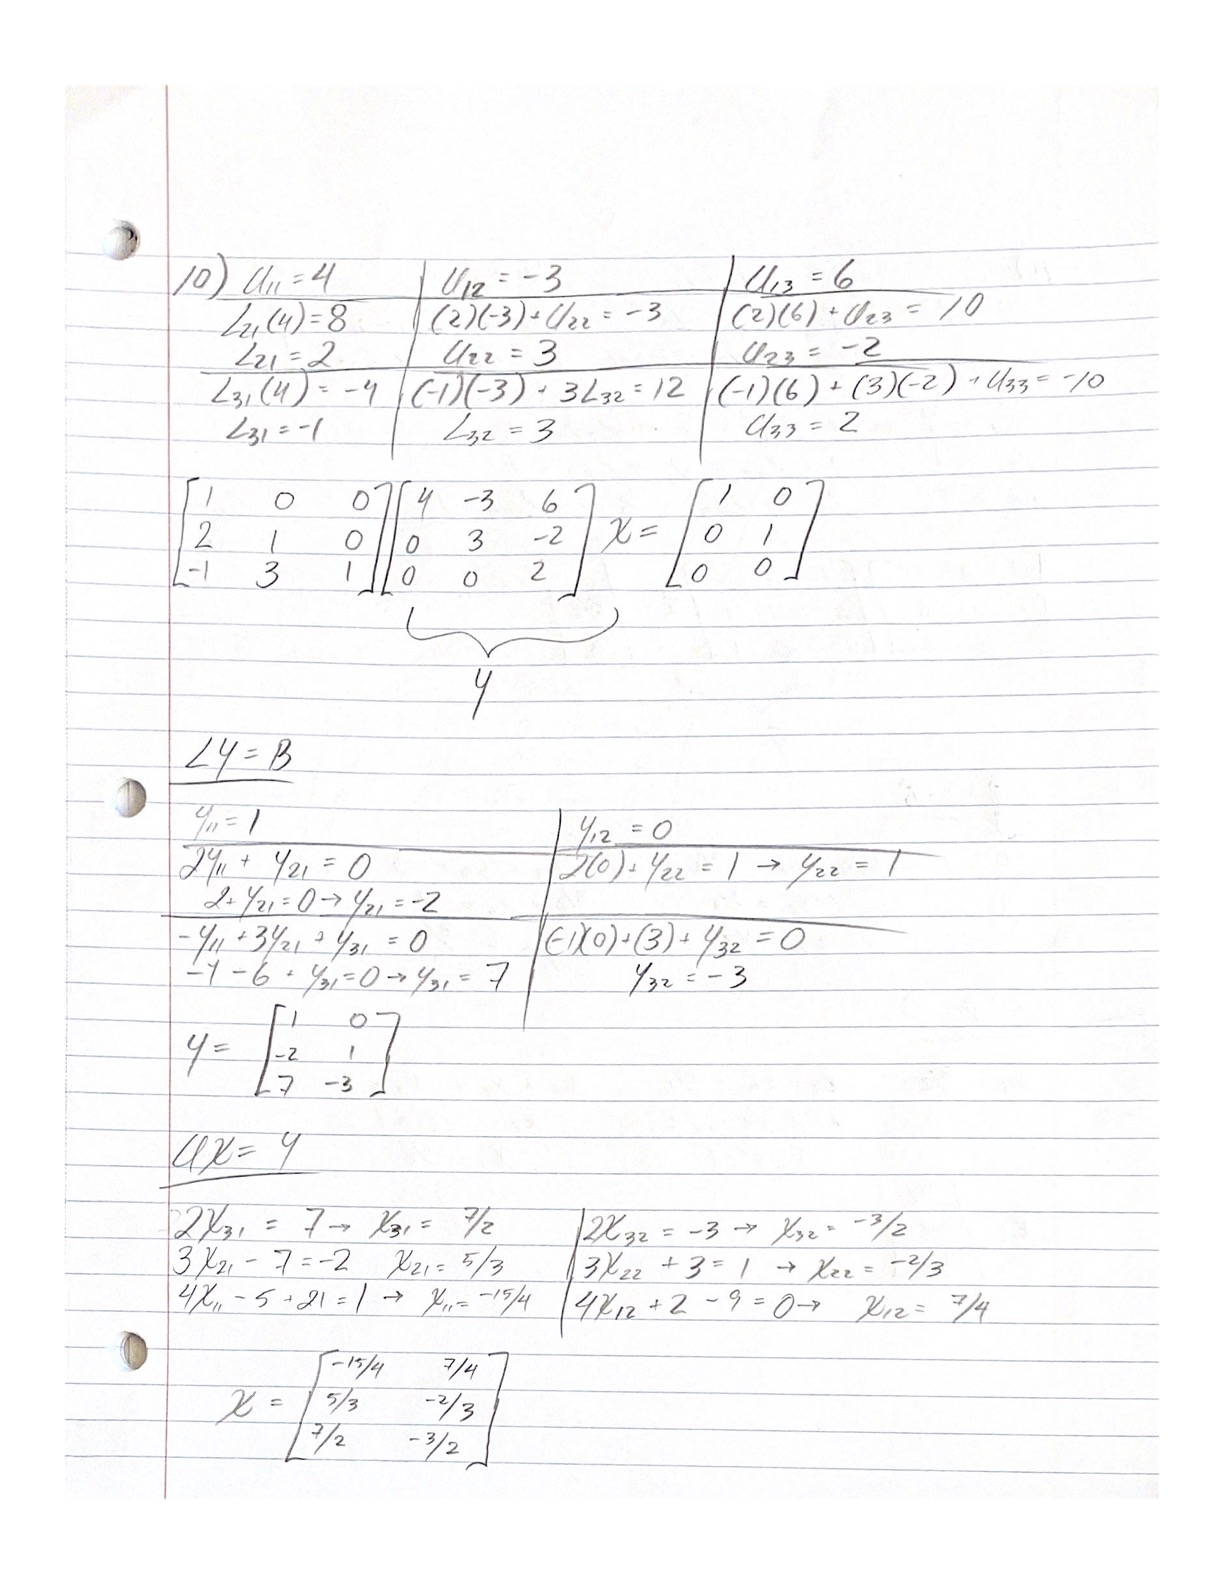

# Problem 11

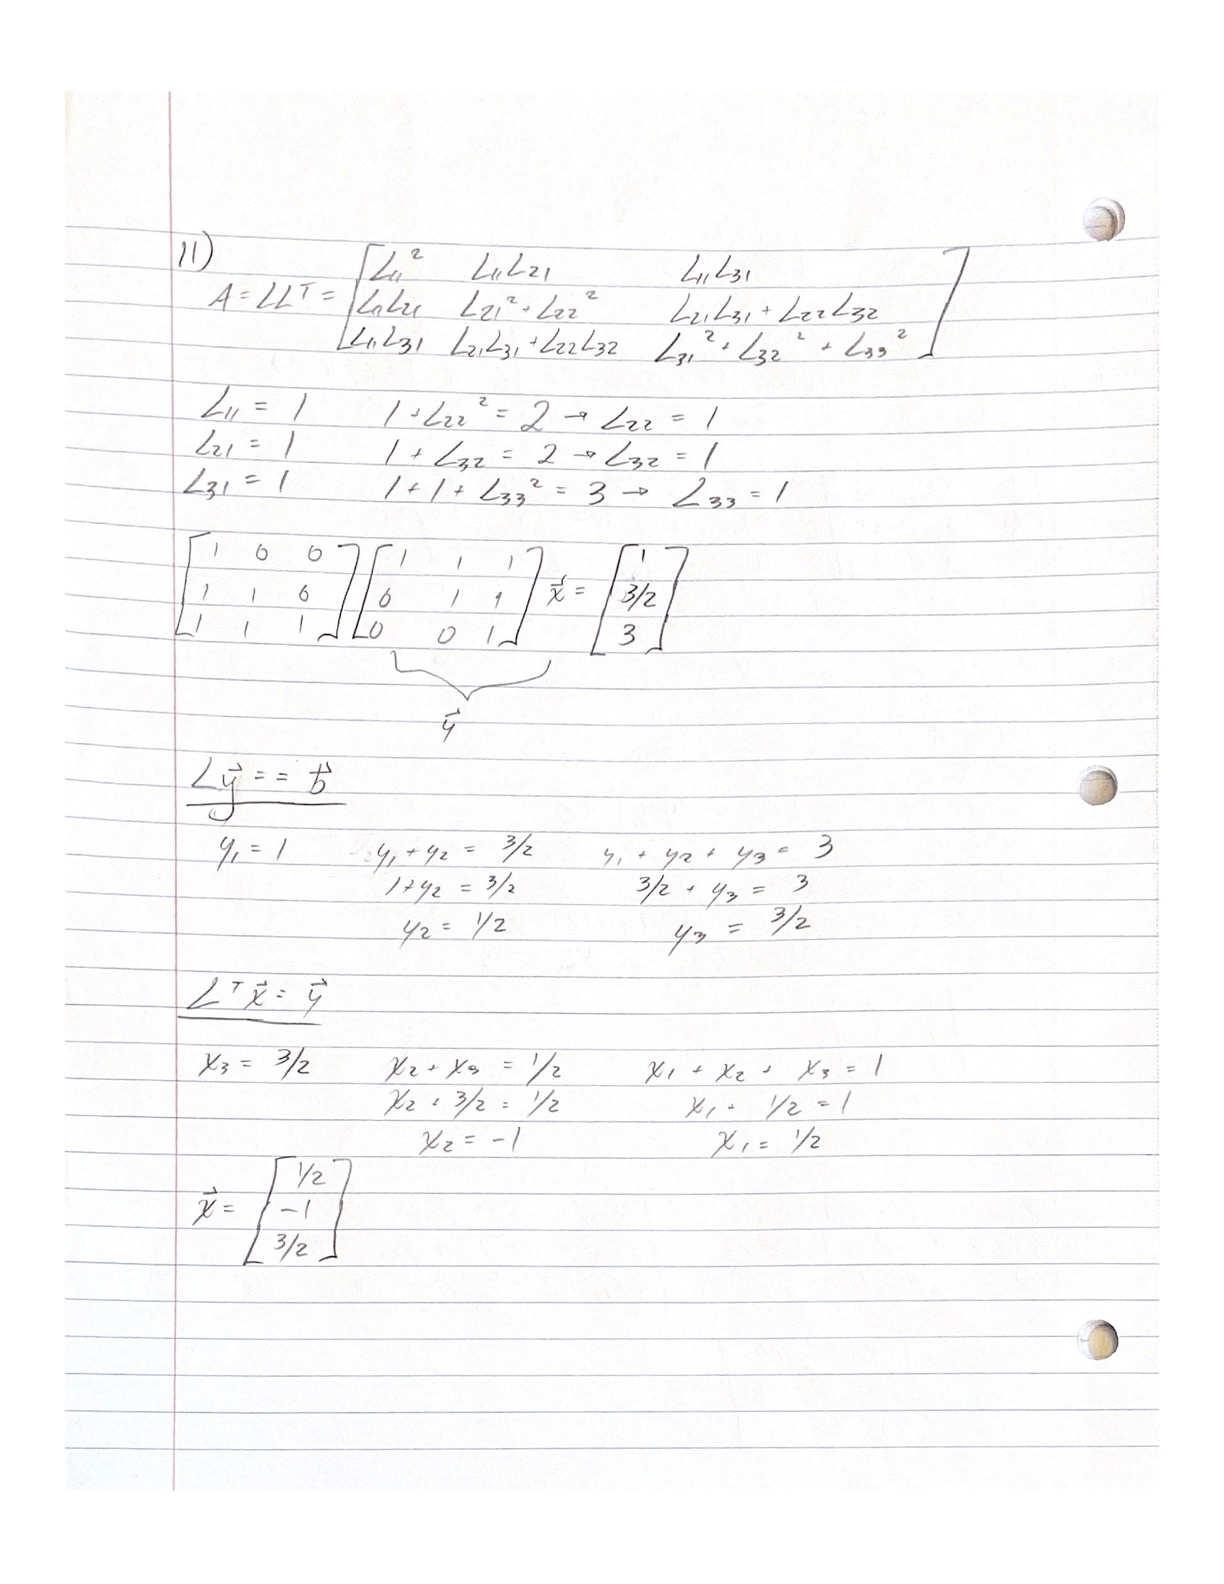

# Problem 13

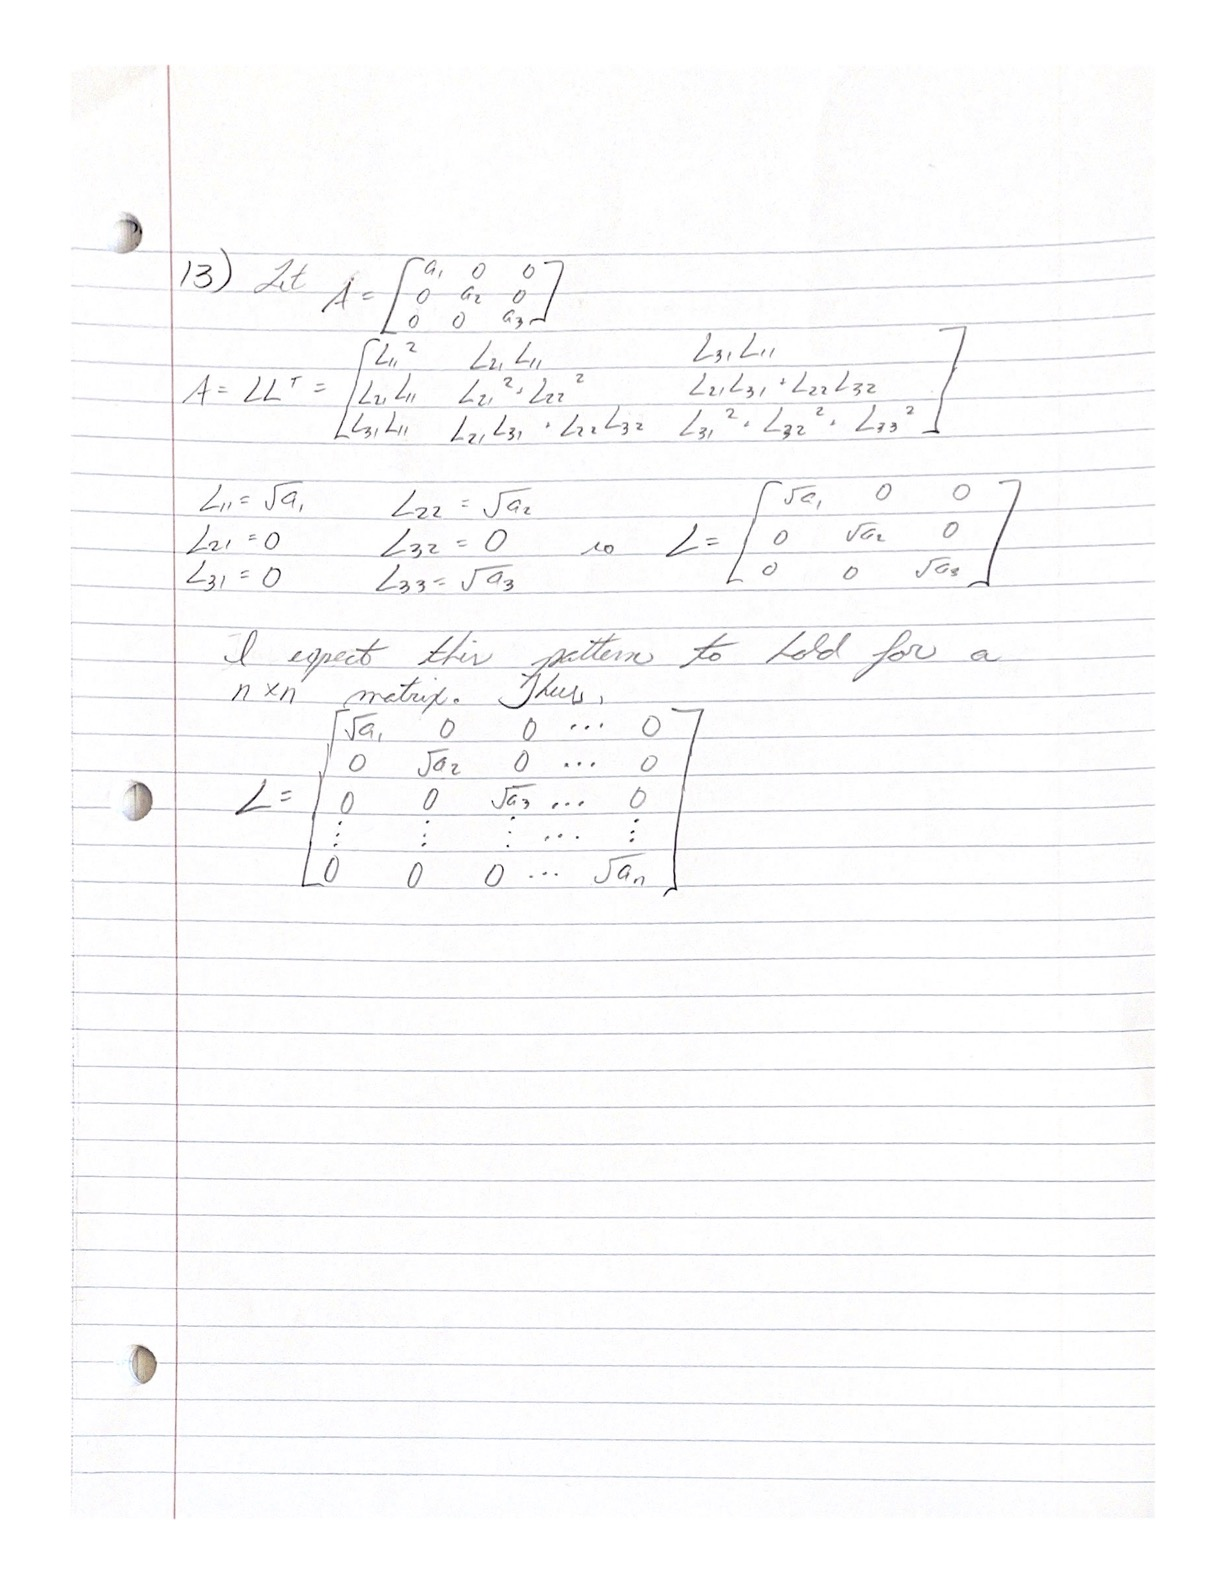

# Problem 15

In [ ]:
import numpy as np

# Build the Hilbert matrix A given input n
def hilbert(n):
  A = np.zeros([n,n])
  for i in range(n):
    for k in range(n):
      A[i,k] = 1/(i+k+1)
  
  b = np.zeros(n)
  for i in range(n):
    for k in range(n):
      b[i] += A[i,k]
  
  return (A, b)

# See page 47 of the textbook
def LUdecomp(A):
  n = len(A)
  for k in range(n-1):
    for i in range(k+1,n):
      if A[i,k] != 0.0:
        lam = A[i,k] / A[k,k]
        A[i,k+1:n] -= lam * A[k,k+1:n]
        A[i,k] = lam
  return A

# Also defined on page 47 of textbook
def LUsolve(A, b):
  n = len(A)
  for k in range(1,n):
    b[k] -= np.dot(A[k,:k], b[:k])

  b[n-1] = b[n-1] / A[n-1,n-1]

  for k in range(n-2,-1,-1):
    b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n])) / A[k,k]

  return b

def investigate(n):
  # Define A and b
  A, b = hilbert(n)

  # Solve A
  A = LUdecomp(A)
  b = LUsolve(A, b)
  
  return b

for n in range(1,100):
  c = investigate(n)
  diff = c - np.ones(n)
  for i in diff:
    if abs(i) > 0.0000005:
      print(n)
      break
  else:
    continue
  break



9


The above code shows that the first $n$ for which the solution is not within six significant figures of the exact solution is 9. Thus, 8 is the largest $n$ for which the solution is within six significant figures. 

For help in using the "break" statement to break out of the nested loops in the last lines of the above code block, I made use of [this StackOverflow thread.](https://stackoverflow.com/questions/653509/breaking-out-of-nested-loops)

# Problem 16

Consider the system of equations 
$$A\vec{x} = \vec{b}$$

such that $A \in \mathbb{R}^{n \times n}$, $\vec{x} \in \mathbb{R}^n$, and $\vec{b} \in \mathbb{R}^n$. Given that $A$ is positive definite, the Choleski Decomposition method calls for us to find a lower triangular matrix $L$ such that 
$$A = L L^T$$

Substituting this into our system from above, we get 
$$L L^T \vec{x} = \vec{b}$$

Note that $L^T \vec{x}$ is itself a vector; call this vector $\vec{y}$. Then solving the system for $\vec{x}$ after finding $L$ amounts to solving the equation 
$$L \vec{y} = \vec{b}$$

and then the equation
$$L^T \vec{x} = \vec{y}$$

Because $L$ is lower triangular, we can solve $L \vec{y} = \vec{b}$ with forward substitution. More specifically, we can state that
$$y_1 = b_1 / L_{1,1}$$

and that 
$$y_k = \frac{b_k - \sum_{j = 1}^{k-1} L_{k,j} b_j}{L_{k,k}}$$

for all integers $k$ in the range $[2, n]$. Note that the sum $\sum_{j = 1}^{k} L_{k,j} b_j$ amounts to the dot product of the first $k-1$ elements row $k$ of $L$ and the first $k-1$ elements of $\vec{b}$. Solving for all $k$, where $k$ is an integer in the range $[1,n]$, will yield $\vec{y}$. We can now perform back substitution to solve the system $L^T \vec{x} = \vec{y}$. We find that 
$$x_n = y_n / L^T_{n,n}$$

and 
$$x_k = \frac{y_k - \sum_{j = k+1}^{n} L^T_{k,j} y_j}{L^T_{k,k}}$$

But, we really need not find $L^T$ to calculate the values of $\vec{x}$ with the knowledge that $L^T_{j,i} = L_{i,j}$. Using this knowledge, we can rewrite the above formulas as such: 
$$x_n = y_n / L_{n,n}$$

$$x_k = \frac{y_k - \sum_{j = k+1}^{n} L_{j,k} x_j}{L_{k,k}}$$

for all integers $k$ in the range $[1, n-1]$ (though when performing back substitution, one must work backwards from $k = n-1$ to $k = 1$). Note that the sum $\sum_{j = k+1}^{n} L_{j,k} y_j$ is the dot product of entries $(k+1)$ to $n$ of column $j$ of $L$ and entries $(k+1)$ to $n$ of $\vec{y}$. 

Thus, we have found the symbolic representations of the substitution algorithms (forward then back) required to solve a system for which we have used the Choleski decomposition. These algorithms are written in python below. 

Filler text to correct formatting.

In [ ]:
import numpy as np

def choleskiSubsitution(L, b):
  n = len(L)
  
  # Forward substitution
  for k in range(n):
    b[k] = (b[k] - np.linalg.dot(L[k],y[:k])) / L[k,k]
  
  # Backwards substitution
  for k in range(n-1,-1,-1):
    b[k] = (b[k] - np.linalg.dot(L[k+1:n,k],y[k+1:n])) / L[k,k]
   
  return b

# Additional Problem

## Part 1

A positive definite matrix is both symmetric and has the property that 
$$x^T M x > 0$$ 
for all vectors $x$. That the matrix is symmetric is shown in the code below. If we divide the inequality above by $x^T x$, we find that 
$$\frac{x^T M x}{x^T x} > 0$$

where $\frac{x^T M x}{x^T x}$ is a Rayleigh quotient for the matrix $M$. Thus, $M$ is positive definite if all of its eigenvalues are greater than 0. This is shown below. 

In [4]:
import numpy as np

A = np.array([[7.16,-1.17,-0.64,1.35,-3.16],
              [-1.17,11.97,-1.30,-3.38,-0.90],
              [-0.64,-1.30,5.11,2.02,1.16],
              [1.35,-3.38,2.02,4.86,-0.52],
              [-3.16,-0.90,1.16,-0.52,3.21]])

print("The eigenvalues of A are:")
for val in np.linalg.eigvals(A): 
  print(val)

# Check to see if A = A^T
print("\n Now checking whether A_{i,j} = A^T_{i,j}")
print(A == np.transpose(A))

The eigenvalues of A are:
14.07579072086515
9.257468805470925
1.079293194395844
2.3965032406151736
5.500944038652899

 Now checking whether A_{i,j} = A^T_{i,j}
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


## Part 2

In [ ]:
import numpy as np

np.set_printoptions(suppress=True)

A = np.array([[7.16,-1.17,-0.64,1.35,-3.16],
              [-1.17,11.97,-1.30,-3.38,-0.90],
              [-0.64,-1.3,5.11,2.02,1.16],
              [1.35,-2.38,2.02,4.86,-0.52],
              [-3.16,-0.9,1.16,-0.52,3.21]])

# Algorithm for Choleski's decomposition, as given in textbook (page 50)
def choleski(A):
  n = len(A)
  for k in range(n):
    # No need to check if positive definite; we showed that in Part 1
    A[k,k] = np.sqrt(A[k,k] - np.dot(A[k,:k], A[k,:k]))
    for i in range(k+1,n):
      A[i,k] = (A[i,k] - np.dot(A[i,:k],A[k,:k])) / A[k,k]
  # Fill in zeros above the main diagonal
  for k in range(1,n): 
    A[0:k,k] = 0.0
  
  return A

L = choleski(A)
print("L = ")
print(L, "\n")
print("U = L^T = ")
print(np.transpose(L))

L = 
[[ 2.67581763  0.          0.          0.          0.        ]
 [-0.43724953  3.43202751  0.          0.          0.        ]
 [-0.23917923 -0.40925692  2.21027194  0.          0.        ]
 [ 0.50451869 -0.6291906   0.85200818  1.86645711  0.        ]
 [-1.18094745 -0.41269154  0.32061441 -0.24485839  1.21749727]] 

U = L^T = 
[[ 2.67581763 -0.43724953 -0.23917923  0.50451869 -1.18094745]
 [ 0.          3.43202751 -0.40925692 -0.6291906  -0.41269154]
 [ 0.          0.          2.21027194  0.85200818  0.32061441]
 [ 0.          0.          0.          1.86645711 -0.24485839]
 [ 0.          0.          0.          0.          1.21749727]]
